# Imports

In [1]:
import numpy as np 
import pandas as pd
from scipy import stats as st
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import precision_recall_curve
from sklearn.preprocessing import label_binarize
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier
from sklearn.calibration import CalibratedClassifierCV, CalibrationDisplay
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
import optuna
import json
from optuna.visualization import plot_optimization_history
from optuna.visualization import plot_parallel_coordinate
from optuna.visualization import plot_param_importances
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sns.set_style("darkgrid")

In [2]:
import warnings
warnings.filterwarnings("ignore")

# Data Summary

If you want to work on cleaned dataset you can directly move to data visualization section, data summary and cleaning section deals with messy and uncleaned data from which after through preprocessing **Loan Credit Score Classification Problem** dataset is created.

In [3]:
train=pd.read_csv('../input/credit-score-classification/train.csv',encoding='latin')
test=pd.read_csv('../input/credit-score-classification/test.csv',encoding='latin')

In [4]:
train.head()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  object 
 1   Customer_ID               100000 non-null  object 
 2   Month                     100000 non-null  object 
 3   Name                      90015 non-null   object 
 4   Age                       100000 non-null  object 
 5   SSN                       100000 non-null  object 
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  object 
 8   Monthly_Inhand_Salary     84998 non-null   float64
 9   Num_Bank_Accounts         100000 non-null  int64  
 10  Num_Credit_Card           100000 non-null  int64  
 11  Interest_Rate             100000 non-null  int64  
 12  Num_of_Loan               100000 non-null  object 
 13  Type_of_Loan              88592 non-null   ob

In [6]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
Monthly_Inhand_Salary,84998.0,4194.170850,3183.686167,303.645417,1625.568229,3093.745000,5957.448333,15204.633333
Num_Bank_Accounts,100000.0,17.091280,117.404834,-1.000000,3.000000,6.000000,7.000000,1798.000000
Num_Credit_Card,100000.0,22.474430,129.057410,0.000000,4.000000,5.000000,7.000000,1499.000000
Interest_Rate,100000.0,72.466040,466.422621,1.000000,8.000000,13.000000,20.000000,5797.000000
Delay_from_due_date,100000.0,21.068780,14.860104,-5.000000,10.000000,18.000000,28.000000,67.000000
Num_Credit_Inquiries,98035.0,27.754251,193.177339,0.000000,3.000000,6.000000,9.000000,2597.000000
Credit_Utilization_Ratio,100000.0,32.285173,5.116875,20.000000,28.052567,32.305784,36.496663,50.000000
Total_EMI_per_month,100000.0,1403.118217,8306.041270,0.000000,30.306660,69.249473,161.224249,82331.000000


In [7]:
# features having missing values

100*train.isnull().sum()

ID                                0
Customer_ID                       0
Month                             0
Name                         998500
Age                               0
SSN                               0
Occupation                        0
Annual_Income                     0
Monthly_Inhand_Salary       1500200
Num_Bank_Accounts                 0
Num_Credit_Card                   0
Interest_Rate                     0
Num_of_Loan                       0
Type_of_Loan                1140800
Delay_from_due_date               0
Num_of_Delayed_Payment       700200
Changed_Credit_Limit              0
Num_Credit_Inquiries         196500
Credit_Mix                        0
Outstanding_Debt                  0
Credit_Utilization_Ratio          0
Credit_History_Age           903000
Payment_of_Min_Amount             0
Total_EMI_per_month               0
Amount_invested_monthly      447900
Payment_Behaviour                 0
Monthly_Balance              120000
Credit_Score                

# Data Cleaning

- On closely observing data, the conslusion is data contains 8 consecutive months data for 12500 customers, while much information remains same for 8 months data like **Name,Annual_Income, Num_Bank_Accounts, Interest_Rate,Num_of_Loan, Outstanding_Debt**,some variables changes evry monthly **Amount_invested_monthly, Monthly_Balance** while there are some variables that dependent on previous values and increments like **Num_of_Delayed_Payment, Num_Credit_Inquiries, Credit_History_Age**.
- There are also outliers and wrong information present like Payment_Behaviour=="!@9#%8", negative values for **Num_Bank_Accounts, Num_of_Loan** and extremely high value for **Amount_invested_monthly** etc.
- For variables where infromation remain same throughout 8 months, we will caluate mode and replace null and wrong values with mode.
- For variables that vary monthly, we will replace outliers and null values using the mode caluated for each customer_id.
- For variables that increments, we will use past and future values to impute missing values using forward and backward fill.
- There are many variables that should be numerical type but present as object type like **Num_of_Loan, Num_of_Delayed_Payment, Changed_Credit_Limit, Outstanding_Debt, Amount_invested_monthly**. These variables contain mixed types some instances as int/float while others as string.
- **ID, Customer_ID, Month, Name, SSN, Occupation, Type_of_Loan** will be dropped as they are not useful for classification task.

## Categorical Variable

In [8]:
data=train.copy()

In [9]:
#Categorical Variables
col=["Credit_Mix", "Payment_of_Min_Amount", "Payment_Behaviour", "Type_of_Loan"]

In [10]:
data["Credit_Mix"].value_counts()

Standard    36479
Good        24337
_           20195
Bad         18989
Name: Credit_Mix, dtype: int64

In [11]:
index=data[data["Credit_Mix"]=="_"].index
data.loc[index,"Credit_Mix"]=np.nan
df=data[-data["Credit_Mix"].isna()]
ser=df.groupby("Customer_ID")["Credit_Mix"].agg(st.mode).apply(lambda x:x[0][0])
data.drop("Credit_Mix",axis=1,inplace=True)
data=pd.merge(left=data,right=ser,how="left",left_on="Customer_ID",right_index=True)

In [12]:
data["Payment_Behaviour"].value_counts()

Low_spent_Small_value_payments      25513
High_spent_Medium_value_payments    17540
Low_spent_Medium_value_payments     13861
High_spent_Large_value_payments     13721
High_spent_Small_value_payments     11340
Low_spent_Large_value_payments      10425
!@9#%8                               7600
Name: Payment_Behaviour, dtype: int64

In [13]:
index=data[data["Payment_Behaviour"]=="!@9#%8"].index
data.loc[index,"Payment_Behaviour"]=np.nan
df=data[-data["Payment_Behaviour"].isna()]
ser=data.groupby("Customer_ID")["Payment_Behaviour"].agg(st.mode).apply(lambda x:x[0][0])
data.drop("Payment_Behaviour",axis=1,inplace=True)
data=pd.merge(left=data,right=ser,how="left",left_on="Customer_ID",right_index=True)

In [14]:
data["Payment_of_Min_Amount"].value_counts()

Yes    52326
No     35667
NM     12007
Name: Payment_of_Min_Amount, dtype: int64

## Numerical Variable

In [15]:
'''Features that should be of numerical type but are present as categorical 
   variable(object type), we will convert them to numerical type.These variable
   contain mix type, for example Monthly_Balance variable contain float type for 
   index 0:98303 and string type from index 98304:99999'''

cols=['Age','Annual_Income','Num_of_Loan','Num_of_Delayed_Payment','Changed_Credit_Limit',
      'Outstanding_Debt','Amount_invested_monthly','Monthly_Balance']

for col in cols:
    data[col]=data[col].apply(lambda x: x if x is np.nan or not isinstance(x, str) 
                        else x.replace("_","")).replace("",np.nan)
    data[col]=data[col].astype(np.float64)

In [16]:
cols=["Age", "Annual_Income", "Num_Bank_Accounts","Num_Credit_Card", "Interest_Rate",
      "Num_of_Loan", "Monthly_Inhand_Salary","Changed_Credit_Limit","Outstanding_Debt",
      "Total_EMI_per_month"]

for col in cols:
    index=data[data[col]<0].index
    data.loc[index,col]=np.nan
    df=data[-data[col].isna()]
    ser=df.groupby("Customer_ID")[col].agg(st.mode).apply(lambda x:x[0][0])
    data.drop(col,axis=1,inplace=True)
    data=pd.merge(left=data,right=ser,how="left",left_on="Customer_ID",right_index=True)

In [17]:
'''These features can best imputed by same feature values present in customer record for 
   different month,therefore we will use that customer record for imputating missing
   value using ffill and bfill'''

inter=data["Credit_History_Age"].str.split(" ")
data["Credit_History_Age"]=inter.apply(lambda x:x if x is np.nan else int(x[0])*12+int(x[3]))

cols=['Num_of_Delayed_Payment', 'Num_Credit_Inquiries',"Credit_History_Age",
      "Delay_from_due_date"]
for col in cols:
    if col in ['Num_of_Delayed_Payment', 'Num_Credit_Inquiries']:
        index2=data[(data[col]>=30)].index
        data.loc[index2,col]=np.nan
    index1=data[(data[col]<0)].index
    data.loc[index1,col]=np.nan
    data[col]=data.groupby("Customer_ID")[col].transform(lambda x:x.ffill())
    data[col]=data.groupby("Customer_ID")[col].transform(lambda x:x.bfill())

In [18]:
for col in ['Amount_invested_monthly', 'Monthly_Balance']:
    if col in ['Amount_invested_monthly']:
        index2=data[(data[col]==10000.0)].index
        data.loc[index2,col]=np.nan
    index1=data[(data[col]<0)].index
    data.loc[index1,col]=np.nan
    ser=data.groupby("Customer_ID")[col].transform(lambda x:x.median())
    data[col].fillna(ser,inplace=True)

In [19]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Delay_from_due_date,100000.0,21.092520,14.826343,0.000000,10.000000,18.000000,28.000000,67.000000
Num_of_Delayed_Payment,100000.0,13.334050,6.271409,0.000000,9.000000,14.000000,18.000000,28.000000
Num_Credit_Inquiries,100000.0,5.773160,3.862301,0.000000,3.000000,5.000000,8.000000,29.000000
Credit_Utilization_Ratio,100000.0,32.285173,5.116875,20.000000,28.052567,32.305784,36.496663,50.000000
Credit_History_Age,100000.0,221.136220,99.680454,1.000000,144.000000,219.000000,302.000000,404.000000
Amount_invested_monthly,100000.0,193.686347,194.785222,0.000000,73.730625,129.361839,234.346249,1977.326102
Monthly_Balance,100000.0,403.492393,214.423009,0.007760,270.322511,337.270985,471.928804,1602.040519
Age,100000.0,33.274560,10.764438,14.000000,24.000000,33.000000,42.000000,56.000000
Annual_Income,100000.0,50505.123449,38299.422093,7005.930000,19342.972500,36999.705000,71683.470000,179987.280000
Num_Bank_Accounts,100000.0,5.367840,2.592597,0.000000,3.000000,5.000000,7.000000,10.000000


In [20]:
#Redundant variable will be dropped

drop=["ID", "Customer_ID", "Month","Name", "SSN", "Occupation","Type_of_Loan"]
data.drop(columns=drop,axis=1,inplace=True)

In [21]:
data.dropna(axis=0, inplace=True)

In [22]:
data.to_csv("Score.csv",index=False)

# Data Visualization

In [23]:
data=pd.read_csv("/kaggle/input/processed-data-credit-score/Score.csv")

## Clean Data Features Description

- **Age**: Represents the age of the person
- **Annual_Income**: Represents the annual income of the person
- **Monthly_Inhand_Salary**: Represents the monthly base salary of a person
- **Num_Bank_Accounts**:Represents the number of bank accounts a person holds
- **Num_Credit_Card**: Represents the number of other credit cards held by a person
- **Interest_Rate**: Represents the interest rate on credit card
- **Num_of_Loan**: Represents the number of loans taken from the bank
- **Delay_from_due_date**: Represents the average number of days delayed from the payment date
- **Num_of_Delayed_Payment**: Represents the average number of payments delayed by a person
- **Changed_Credit_Limit**: Represents the percentage change in credit card limit
- **Num_Credit_Inquiries**: Represents the number of credit card inquiries
- **Credit_Mix**: Represents the classification of the mix of credits
- **Outstanding_Debt**: Represents the remaining debt to be paid (in USD)
- **Credit_Utilization_Ratio**: Represents the utilization ratio of credit card
- **Credit_History_Age**: Represents the age of credit history of the person
- **Payment_of_Min_Amount**: Represents whether only the minimum amount was paid by the person
- **Total_EMI_per_month**: Represents the monthly EMI payments (in USD)
- **Amount_invested_monthly**: Represents the monthly amount invested by the customer (in USD)
- **Monthly_Balance**: Represents the monthly balance amount of the customer (in USD)
- **Credit_Score**: Represents the bracket of credit score (Poor, Standard, Good)

In [24]:
X=data.drop("Credit_Score",axis=1)
y=data["Credit_Score"]

numeric=X.select_dtypes(exclude="object").columns
categorical=['Payment_of_Min_Amount', 'Credit_Mix']

low_cardinality=[col for col in numeric if data[col].nunique()<=30]
high_cardinality=[col for col in numeric if data[col].nunique()>30]

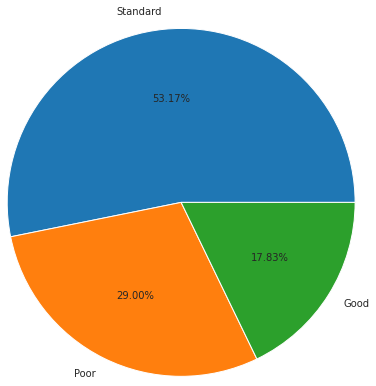

In [25]:
ser=data["Credit_Score"].value_counts()
plt.pie(x=ser.values, labels=ser.index, autopct="%0.2f%%", radius=2);
plt.savefig("image1.png")

**There is unequal class distribution in target variable,but the difference ratio is not very high. we will test cost-sensitive learning on the dataset.**

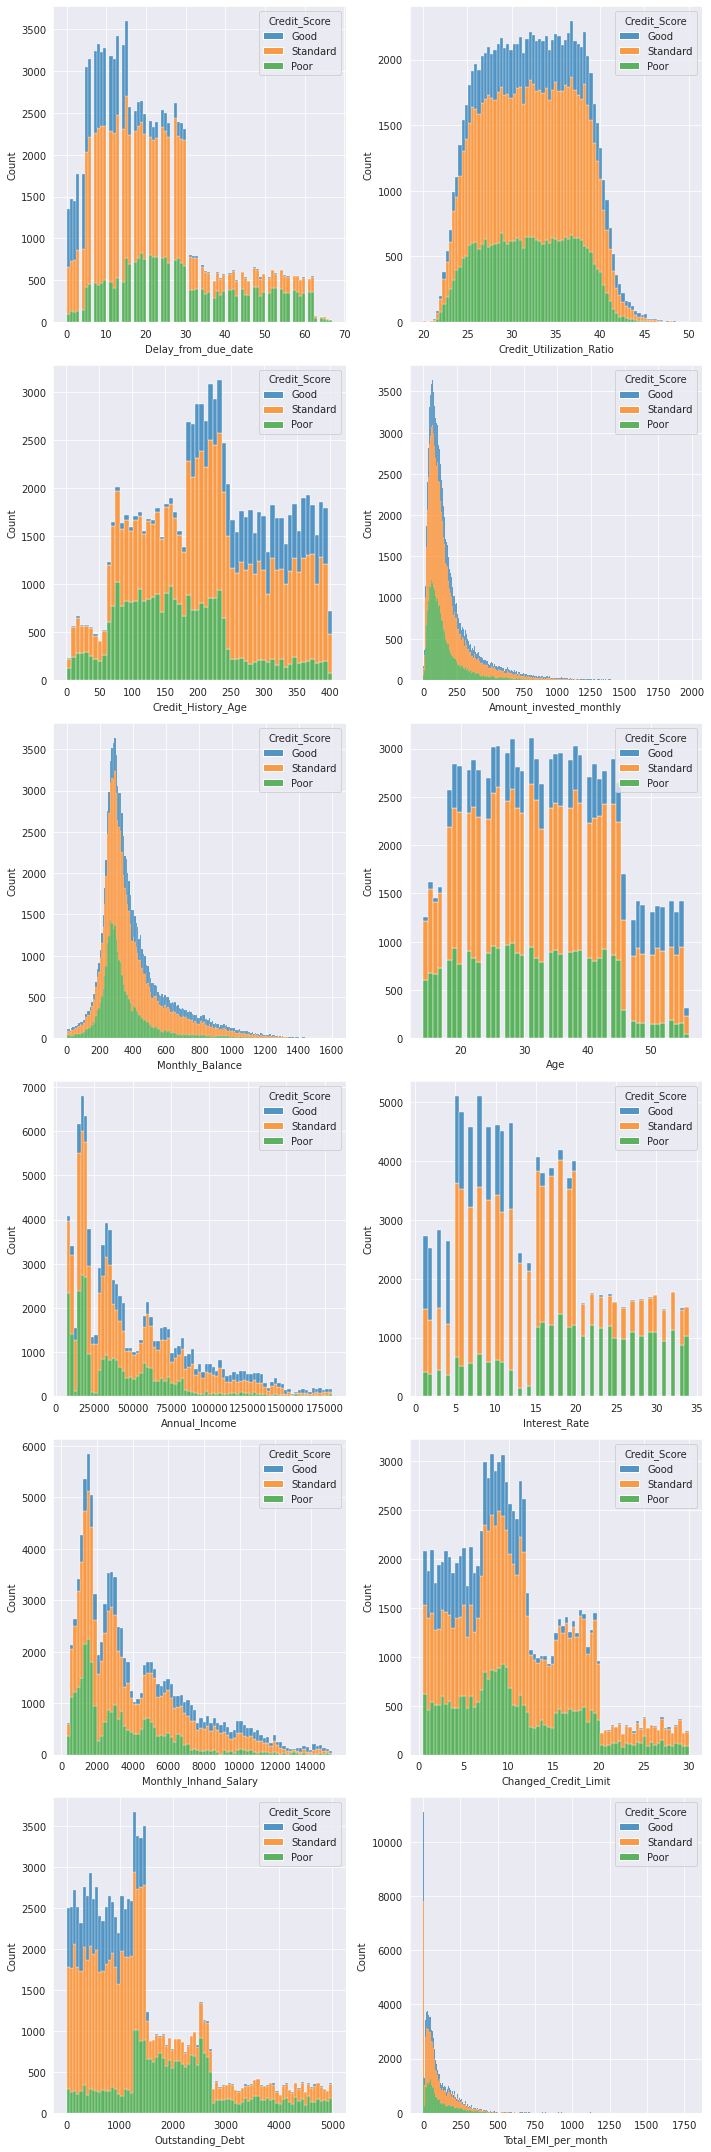

In [26]:
rows=[len(high_cardinality)//2 if len(high_cardinality)%2==0 else len(high_cardinality)//2+1]
fig,axes=plt.subplots(rows[0],2,figsize=(10,30))

ax=axes.flatten()
for i,col in enumerate(high_cardinality):
    sns.histplot(data=data,x=col,hue="Credit_Score",ax=ax[i],multiple="stack");
    
plt.tight_layout()
plt.savefig("image2.png")

- **Outstanding_Dedt,Interest_Rate,Delay_from_due_date** as these variables value increases, the proportion of Bad Credit_Score instances increases substantially, while Standard and Good Credit_Score instances proportion become meagre. 
- On the other hand increase in **Credit_History_Age, Age** reults in decrease of Bad Credit_Score instances, jump in Standard and Good Credit_Score instance.
- Interestingly credit_utilization_ratio seems to seems to have same distribution for all categories of credit score.
- The distribution of many features have non-gaussian distribution and largely different scales, therefore we will tranform feature variables.

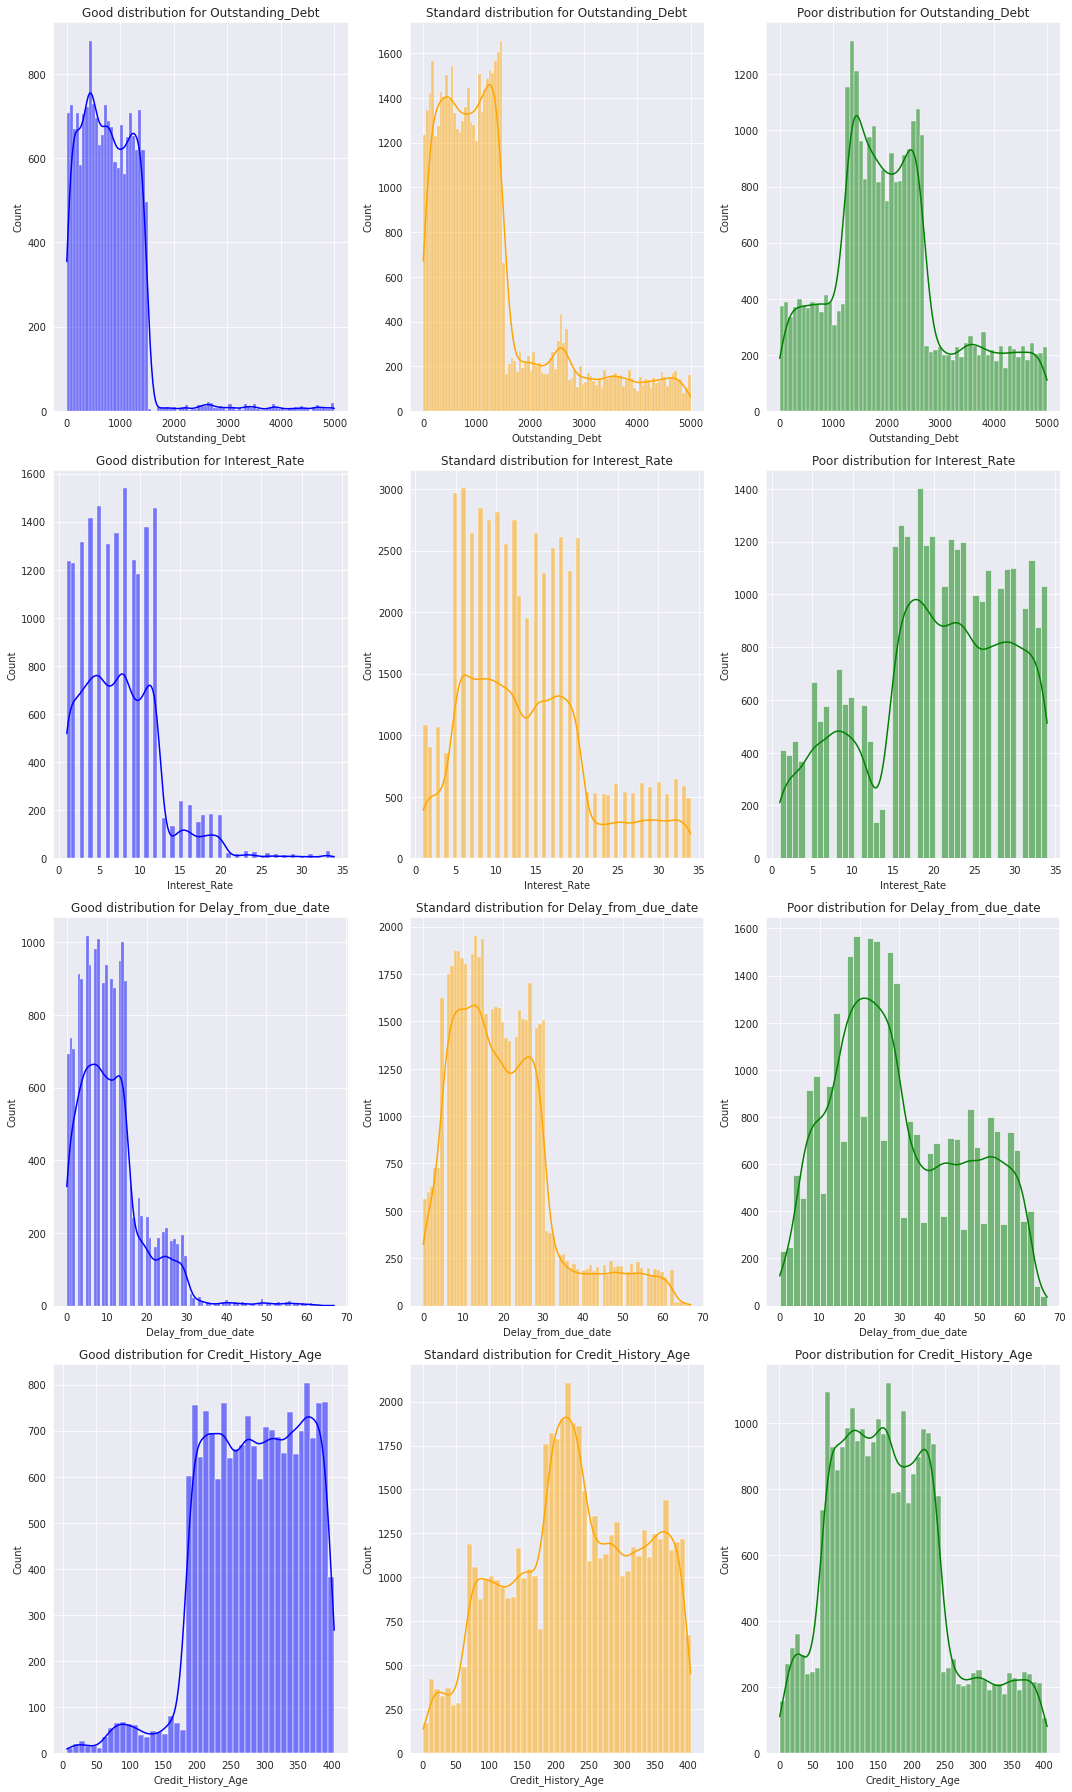

In [27]:
cols=["Outstanding_Debt", "Interest_Rate", "Delay_from_due_date", "Credit_History_Age"]
vals=["Good","Standard","Poor"]
colors=["blue","orange","green"]

fig,axes=plt.subplots(len(cols),3,figsize=(15,25))

for i,col in enumerate(cols):
    for j,(val,color) in enumerate(zip(vals,colors)):
        ax=axes[i,j]
        inter=data[data["Credit_Score"]==val]
        sns.histplot(data=inter,x=col,ax=ax,color=color,kde=True);
        ax.set_title(f"{val} distribution for {col}")
    
plt.tight_layout()
plt.savefig("image3.png")

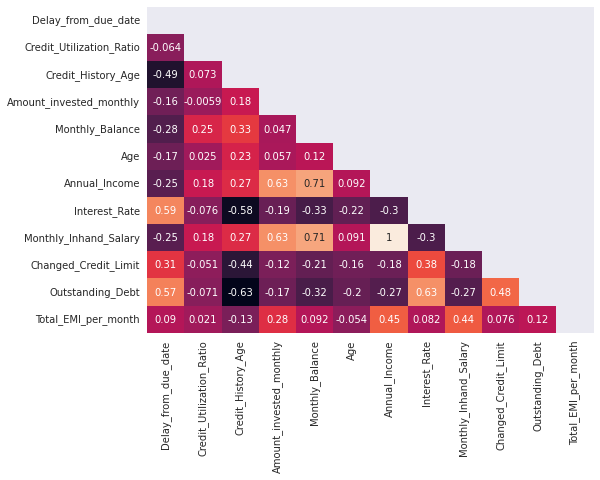

In [28]:
plt.figure(figsize=(8, 6))
arr=np.ones_like(data[high_cardinality].corr())
mask=np.triu(arr)
sns.heatmap(data[high_cardinality].corr(), cbar=False, annot=True, fmt=".2g", mask=mask);
plt.savefig("image4.png")

- Many variable have strong correlation with others,for example **Num_of_Delayed_Payment** has strong positive correlation with interest_rate charged(0.57), outstanding_debt(0.50), delay_from_due_date (0.54), Num_Credit_Inquiries (0.50) and strong negative correlation with Credit_History_Age (-0.49) and Monthly_Inhand_Salary(-0.28).

- **A person who has taken large sum of money at high interest rate with less salary, financial discipline and savings are more likely to have high no of delayed payments, looking for more credit to pay off loans, ending up with high interest rate and large debt.**

- **Credit_History_Age** has strong negative correlation with Num_of_Delayed_Payment, Num_Credit_Inquiries, Interest_Rate, Outstanding_Debt.

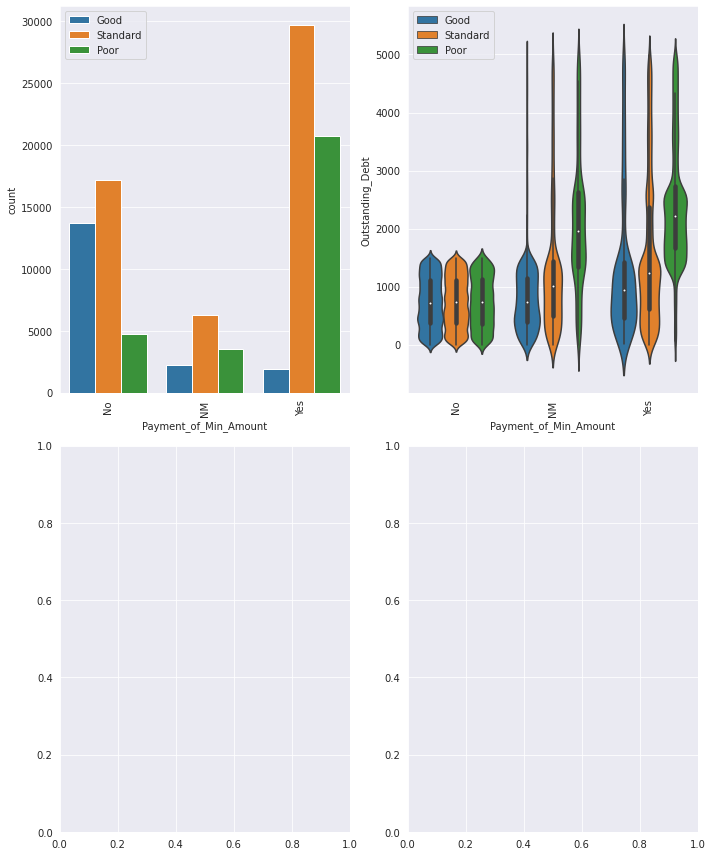

In [29]:
fig,axes=plt.subplots(2,2,figsize=(10,12))

for i,col in enumerate(categorical[:-1]):
    ax=axes[i,0]
    sns.countplot(x=data[col],hue=data["Credit_Score"],ax=ax)
    ax.set_xticklabels(labels=data[col].unique(),rotation=90)
    ax.legend()
    
    ax=axes[i,1]
    sns.violinplot(x=data[col],hue=data["Credit_Score"],y=data["Outstanding_Debt"],ax=ax)
    ax.set_xticklabels(labels=data[col].unique(),rotation=90)
    ax.legend()
    
plt.tight_layout()
plt.savefig("image5.png")

- We can see **Credit_Mix** and **Payment_of_Min_Amount** influences the categories of Credit_Score
- If someone has made Payment_of_Min_Amount, poor score have higher outstanding debt than standard and good debt, while if someone has not made Payment_of_Min_Amount then outstanding debt have no impact on credit score.

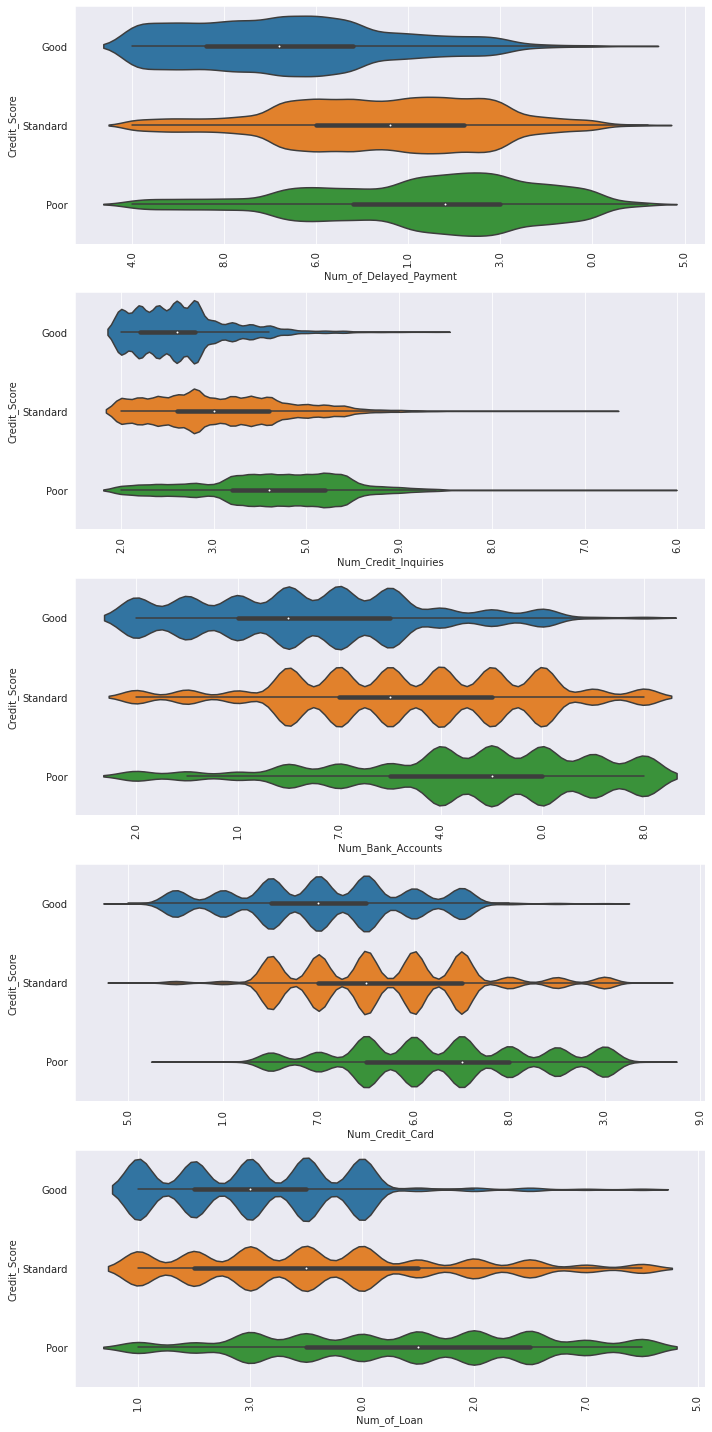

In [30]:
fig,axes=plt.subplots(5,figsize=(10,20))

for i,col in enumerate(low_cardinality):

    ax=axes[i]
    sns.violinplot(x=data[col],y=data["Credit_Score"],ax=ax);
    ax.set_xticklabels(labels=data[col].unique(),rotation=90)
    
plt.tight_layout()
plt.savefig("image6.png")

- As the variables **Num_of_Delayed_Payment, Num_Credit_Inquiries, Num_Bank_Accounts, Num_Credit_Card, Num_of_Loan** values increases the proportion of poor credit scores increases, while good and standard credit scores instances were quite less.
- **Num_of_Delayed_Payment** variable having the most visible effect.

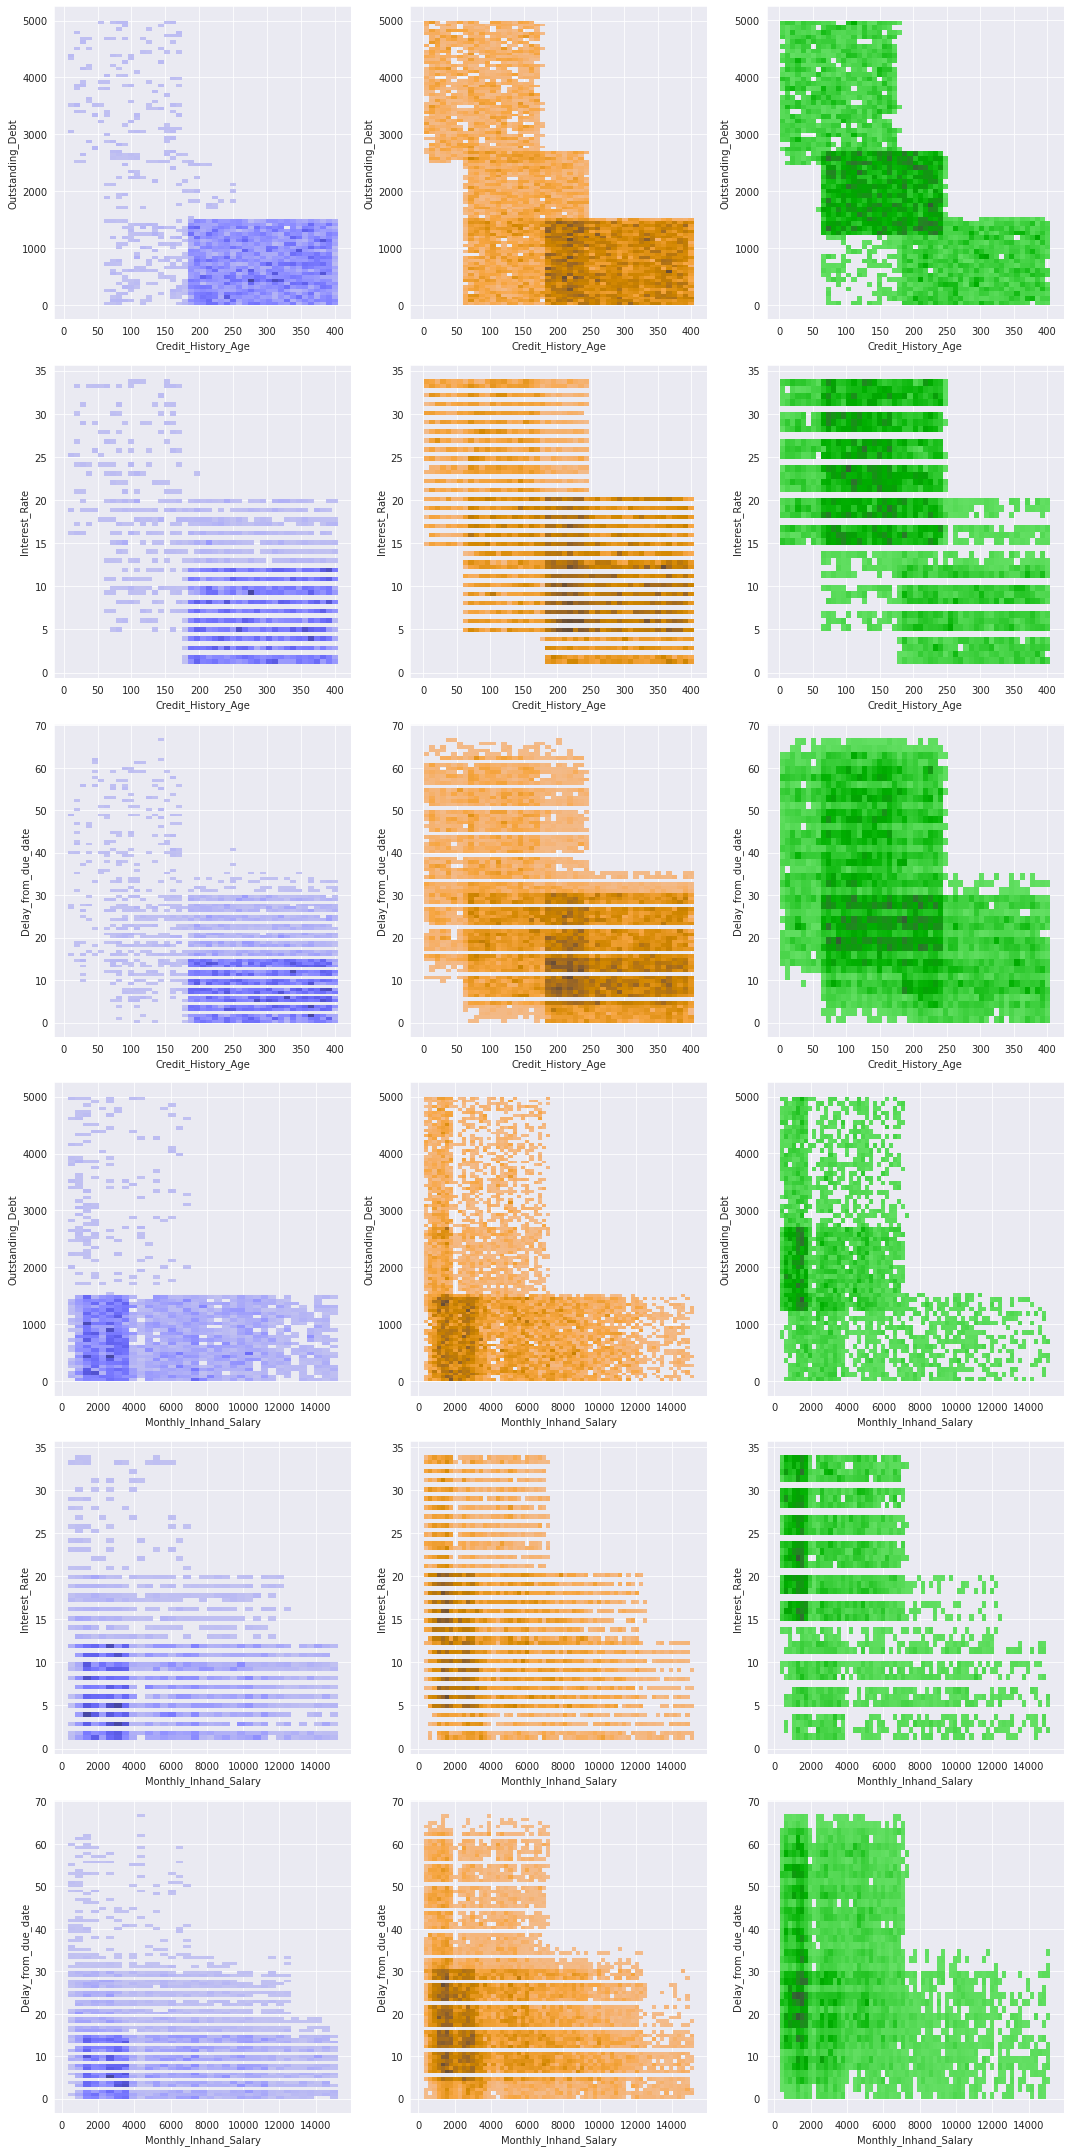

In [31]:
from itertools import product
arr1=["Credit_History_Age","Monthly_Inhand_Salary"]
arr2=["Outstanding_Debt","Interest_Rate","Delay_from_due_date"]

pairs=list(product(arr1,arr2))

fig,axes=plt.subplots(len(pairs),3,figsize=(15,30))

for i,(x,y) in enumerate(pairs):
    colors=["blue","orange","green"]
    vals=["Good","Standard","Poor"]
    for j,(color,val) in enumerate(zip(colors,vals)):
        ax=axes[i,j]
        inter=data[data["Credit_Score"]==val]
        sns.histplot(x=x,y=y,data=inter,color=color,ax=ax);
    
plt.tight_layout()
plt.savefig("image7.png")

- Theses charts shows density distribution of credit scores categories using bivariate analysis.
- **Overlapping instances zones are places where instances are mostly misclassified, seeing the data ensemble based learning methods will be best, while linear models will be ineffective because of presence of complex non-linear relationship.SVM will be time consuming because of large dataset size, overlapping of instances** 

# Data Preprocessing

In [32]:
#label encoding target variable
label=LabelEncoder()
label.fit(data["Credit_Score"])
y=label.transform(data["Credit_Score"])

#transforming and scaling numerical variable
transformer=PowerTransformer()
transformer.fit(data[high_cardinality])
numeric=transformer.transform(data[high_cardinality])

#one hot encoding 
encoding=OneHotEncoder(drop="first")
encoding.fit(data[categorical])
one_hot=encoding.transform(data[categorical]).toarray()

#ordinal variables
ordinal=data[low_cardinality].values

#Feature array
X=np.concatenate([numeric,one_hot,ordinal],axis=1)

# Algorithm Spot Checking

In [33]:
def get_models():
    names,models=[],[]
    
    models.append(RandomForestClassifier(random_state=42,n_jobs=-1))
    names.append("RandomForestClassifier")
    
    models.append(XGBClassifier(random_state=42,n_jobs=-1))
    names.append("XGBClassifier")
    
    models.append(LGBMClassifier(random_state=42,n_jobs=-1))
    names.append("LGBMClassifier")
    
    return names,models

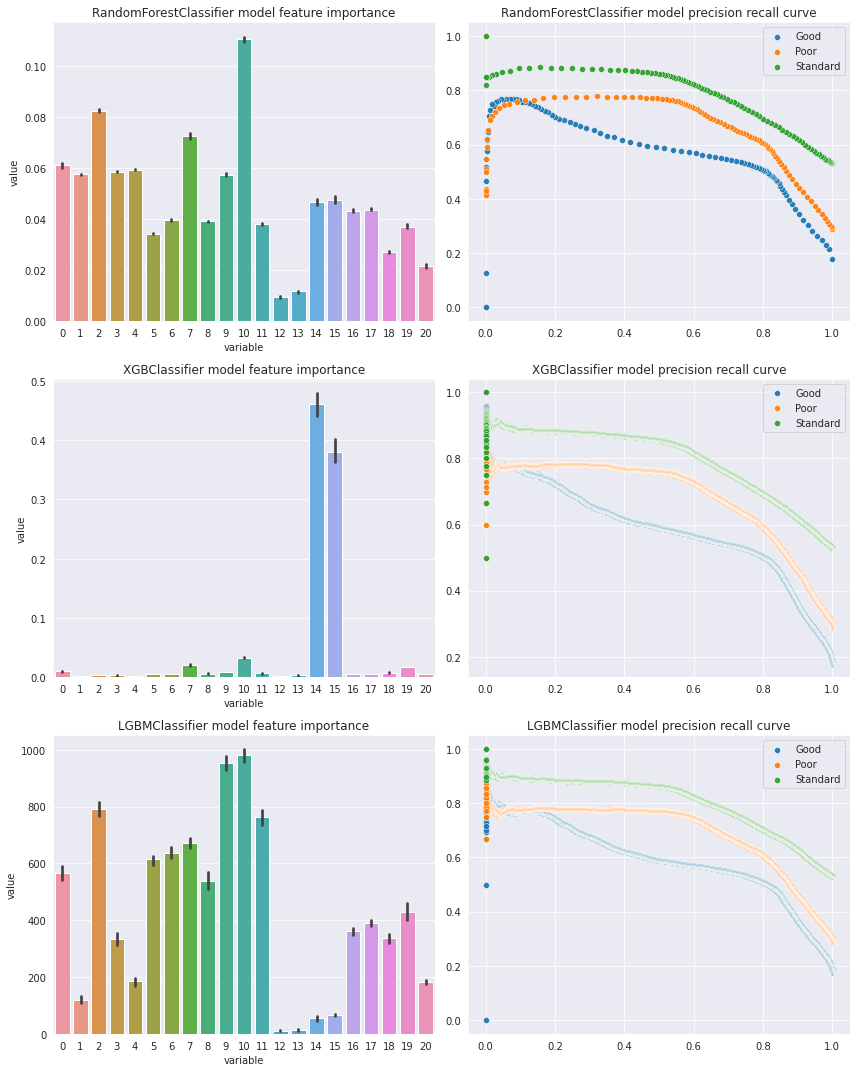

In [34]:
names,models=get_models()
fig,axes=plt.subplots(3,2,figsize=(12,15))
result={}

for i in range(len(models)):
    scores=[]
    importance=[]
    probability=[]
    
    for train_idx,val_idx in StratifiedKFold(n_splits=5).split(X,y):
        model=models[i].fit(X[train_idx,:],y[train_idx])
        y_pred=model.predict(X[val_idx,:])
        y_true=y[val_idx]
        score=f1_score(y_true,y_pred,average='macro')
        
        scores.append(score)
        importance.append(model.feature_importances_)
        probability.append(model.predict_proba(X[val_idx,:]))
        
    ax=axes[i,0]
    frame=pd.DataFrame(importance)
    result_p=pd.melt(frame,value_vars=frame.columns)
    sns.barplot(x="variable",y="value",data=result_p,ax=ax);
    ax.set_title(f"{names[i]} model feature importance")
        
    ax=axes[i,1]
    y_true=label_binarize(y,classes=range(len(label.classes_)))
    y_proba=np.concatenate([probability[j] for j in range(len(probability))])
    for k in range(len(label.classes_)):
        precision,recall,thresh=precision_recall_curve(y_true[:,k],y_proba[:,k])
        sns.scatterplot(recall, precision, alpha=0.95,ax=ax,label=label.classes_[k])
    ax.legend()
    ax.set_title(f"{names[i]} model precision recall curve")
            
    plt.tight_layout()
    result[names[i]]=scores
    
plt.savefig("image8.png")

- **While the precision recall curve is nearly same for all three classifier, different features are hold diffrenet significance for models, with xgboost model feature importance quite from other model. This signifies that model are diffrent and using their values in an ensemble or stacking might increase performance. Also lgbm model performed better than xgboost and random forest classifier.**

- **The precision recall curve also tells us that good credit score is misclssified more than standard and poor credit score class. Standard Credit Score class is misclassified least across all three models.**

- **The models are performing better on standard instances, underperforming on good and poor instances this can be due to class imbalance. Therefore we can use data sampling technique specially those that increase the instances of classes in borderline or overlapping area.**

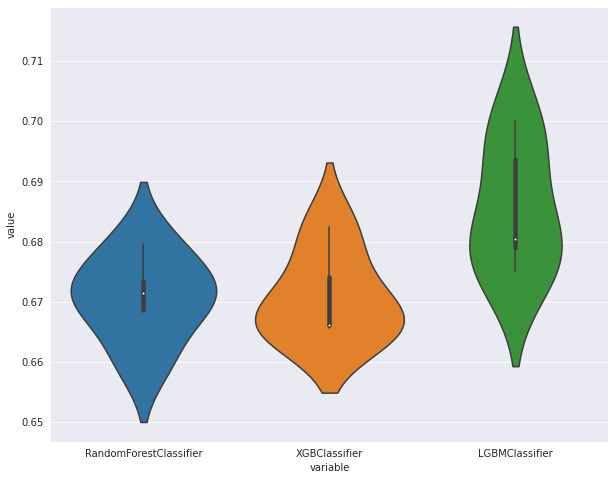

In [35]:
plt.figure(figsize=(10,8))
frame=pd.DataFrame(result)
result_p=pd.melt(frame,value_vars=frame.columns)
sns.violinplot(x="variable",y="value",data=result_p);
plt.savefig("image9.png")

# LGBMClassifier

In [36]:
def objective(trial):
    
    params={"n_estimators":trial.suggest_int("n_estimators",100,400),
            "max_depth":trial.suggest_int("max_depth",3,8),
            "learning_rate":trial.suggest_float("learning_rate", 0.01, 0.1,log=True),
            "subsample":trial.suggest_float("subsample",0.2,0.8),
            "colsample_bytree": trial.suggest_float("colsample_bytree",0.2,0.8),
            "reg_lambda":trial.suggest_float("reg_lambda", 0.01, 0.1,log=True)}
    
    model=LGBMClassifier(**params,random_state=42,n_jobs=-1)
    cv=StratifiedKFold(n_splits=5)
    scores=cross_val_score(model,X,y,scoring="f1_macro",cv=cv,n_jobs=-1)
    trial.set_user_attr("f1_macro", scores.mean())
    
    return scores.mean()

In [37]:
study = optuna.create_study(study_name="Hyperparameter optimization",direction="maximize",
                            sampler=optuna.samplers.TPESampler(seed=42))
study.optimize(objective, n_trials=20,show_progress_bar=True)

[I 2023-05-22 11:32:16,514] A new study created in memory with name: Hyperparameter optimization


  0%|          | 0/20 [00:00<?, ?it/s]

[I 2023-05-22 11:32:36,354] Trial 0 finished with value: 0.6812992148986478 and parameters: {'n_estimators': 212, 'max_depth': 8, 'learning_rate': 0.05395030966670229, 'subsample': 0.559195090518222, 'colsample_bytree': 0.29361118426546196, 'reg_lambda': 0.01432169828911152}. Best is trial 0 with value: 0.6812992148986478.
[I 2023-05-22 11:32:45,161] Trial 1 finished with value: 0.6557594598352356 and parameters: {'n_estimators': 117, 'max_depth': 8, 'learning_rate': 0.039913058785616795, 'subsample': 0.6248435466776274, 'colsample_bytree': 0.21235069657748148, 'reg_lambda': 0.09330606024425668}. Best is trial 0 with value: 0.6812992148986478.
[I 2023-05-22 11:33:11,372] Trial 2 finished with value: 0.6890113948002656 and parameters: {'n_estimators': 350, 'max_depth': 4, 'learning_rate': 0.015199348301309814, 'subsample': 0.3100427059120603, 'colsample_bytree': 0.38254534577572263, 'reg_lambda': 0.03347776308515933}. Best is trial 2 with value: 0.6890113948002656.
[I 2023-05-22 11:33:2

In [38]:
print(f"Best value: {study.best_trial.value}")
print(f"Best hyperparameters:\n {json.dumps(study.best_trial.params, indent=2)}")

Best value: 0.6921137309070311
Best hyperparameters:
 {
  "n_estimators": 319,
  "max_depth": 5,
  "learning_rate": 0.01007506187129231,
  "subsample": 0.7243746196920224,
  "colsample_bytree": 0.6043128820104816,
  "reg_lambda": 0.010068213652019799
}


In [39]:
plot_optimization_history(study)

In [40]:
plot_param_importances(study)
plt.savefig("image10.png")

<Figure size 432x288 with 0 Axes>

In [41]:
params=["n_estimators","max_depth","learning_rate","colsample_bytree"]
plot_parallel_coordinate(study,params=params)
plt.savefig("image11.png")

<Figure size 432x288 with 0 Axes>

# XGBClassifier

In [42]:
def objective(trial):
    
    params={"n_estimators":trial.suggest_int("n_estimators",100,400),
            "max_depth":trial.suggest_int("max_depth",3,8),
            "learning_rate":trial.suggest_float("learning_rate", 0.01, 0.1,log=True),
            "subsample":trial.suggest_float("subsample",0.2,0.8),
            "colsample_bytree": trial.suggest_float("colsample_bytree",0.2,0.8),
            "reg_lambda":trial.suggest_float("reg_lambda", 0.01, 0.1,log=True)}
    
    model=XGBClassifier(**params,random_state=42,n_jobs=-1)
    cv=StratifiedKFold(n_splits=5)
    scores=cross_val_score(model,X,y,scoring="f1_macro",cv=cv,n_jobs=-1)
    trial.set_user_attr("f1_macro", scores.mean())
    
    return scores.mean()

In [43]:
study = optuna.create_study(study_name="Hyperparameter optimization",direction="maximize",
                            sampler=optuna.samplers.TPESampler(seed=42))
study.optimize(objective, n_trials=20,show_progress_bar=True)

[I 2023-05-22 11:41:57,283] A new study created in memory with name: Hyperparameter optimization


  0%|          | 0/20 [00:00<?, ?it/s]

[I 2023-05-22 11:44:43,884] Trial 0 finished with value: 0.6759474399887391 and parameters: {'n_estimators': 212, 'max_depth': 8, 'learning_rate': 0.05395030966670229, 'subsample': 0.559195090518222, 'colsample_bytree': 0.29361118426546196, 'reg_lambda': 0.01432169828911152}. Best is trial 0 with value: 0.6759474399887391.
[I 2023-05-22 11:45:55,820] Trial 1 finished with value: 0.6543100359468463 and parameters: {'n_estimators': 117, 'max_depth': 8, 'learning_rate': 0.039913058785616795, 'subsample': 0.6248435466776274, 'colsample_bytree': 0.21235069657748148, 'reg_lambda': 0.09330606024425668}. Best is trial 0 with value: 0.6759474399887391.
[I 2023-05-22 11:48:16,633] Trial 2 finished with value: 0.6857983499437788 and parameters: {'n_estimators': 350, 'max_depth': 4, 'learning_rate': 0.015199348301309814, 'subsample': 0.3100427059120603, 'colsample_bytree': 0.38254534577572263, 'reg_lambda': 0.03347776308515933}. Best is trial 2 with value: 0.6857983499437788.
[I 2023-05-22 11:49:3

In [44]:
print(f"Best value: {study.best_trial.value}")
print(f"Best hyperparameters:\n {json.dumps(study.best_trial.params, indent=2)}")

Best value: 0.6913110613891651
Best hyperparameters:
 {
  "n_estimators": 319,
  "max_depth": 5,
  "learning_rate": 0.010320226911021985,
  "subsample": 0.41644521272647506,
  "colsample_bytree": 0.6465159042623695,
  "reg_lambda": 0.04479410490748427
}


In [45]:
plot_optimization_history(study)

In [46]:
plot_param_importances(study)
plt.savefig("image12.png")

<Figure size 432x288 with 0 Axes>

In [47]:
params=["n_estimators","max_depth","colsample_bytree"]
plot_parallel_coordinate(study,params=params)
plt.savefig("image13.png")

<Figure size 432x288 with 0 Axes>

# RandomForestClassifer

In [48]:
def objective(trial):
    
    params={"n_estimators":trial.suggest_int("n_estimators",100,400),
            "max_depth":trial.suggest_int("max_depth",3,8),
            "max_samples":trial.suggest_float("max_samples",0.2,0.8),
            "min_samples_split": trial.suggest_int("min_samples_split",2,20),
            "max_features":trial.suggest_categorical("max_features", ["auto", "sqrt", "log2"])}
    
    model=RandomForestClassifier(**params,random_state=42,n_jobs=-1)
    cv=StratifiedKFold(n_splits=5)
    scores=cross_val_score(model,X,y,scoring="f1_macro",cv=cv,n_jobs=-1)
    trial.set_user_attr("f1_macro", scores.mean())
    
    return scores.mean()

In [49]:
study = optuna.create_study(study_name="Hyperparameter optimization",direction="maximize",
                            sampler=optuna.samplers.TPESampler(seed=42))
study.optimize(objective, n_trials=20,show_progress_bar=True)

[I 2023-05-22 12:54:13,113] A new study created in memory with name: Hyperparameter optimization


  0%|          | 0/20 [00:00<?, ?it/s]

[I 2023-05-22 12:54:56,110] Trial 0 finished with value: 0.6902490331973293 and parameters: {'n_estimators': 212, 'max_depth': 8, 'max_samples': 0.6391963650868431, 'min_samples_split': 13, 'max_features': 'auto'}. Best is trial 0 with value: 0.6902490331973293.
[I 2023-05-22 12:55:54,895] Trial 1 finished with value: 0.6816766509701585 and parameters: {'n_estimators': 360, 'max_depth': 6, 'max_samples': 0.6248435466776274, 'min_samples_split': 2, 'max_features': 'auto'}. Best is trial 0 with value: 0.6902490331973293.
[I 2023-05-22 12:56:09,845] Trial 2 finished with value: 0.6609812856760207 and parameters: {'n_estimators': 154, 'max_depth': 4, 'max_samples': 0.38254534577572263, 'min_samples_split': 11, 'max_features': 'log2'}. Best is trial 0 with value: 0.6902490331973293.
[I 2023-05-22 12:56:23,940] Trial 3 finished with value: 0.661151005416642 and parameters: {'n_estimators': 141, 'max_depth': 4, 'max_samples': 0.4198171059762151, 'min_samples_split': 10, 'max_features': 'auto'

In [50]:
print(f"Best value: {study.best_trial.value}")
print(f"Best hyperparameters:\n {json.dumps(study.best_trial.params, indent=2)}")

Best value: 0.6902490331973293
Best hyperparameters:
 {
  "n_estimators": 212,
  "max_depth": 8,
  "max_samples": 0.6391963650868431,
  "min_samples_split": 13,
  "max_features": "auto"
}


In [51]:
plot_optimization_history(study)

In [52]:
plot_param_importances(study)
plt.savefig("image14.png")

<Figure size 432x288 with 0 Axes>

In [53]:
params=["max_depth", "max_samples", "min_samples_split"]
plot_parallel_coordinate(study,params=params)
plt.savefig("image15.png")

<Figure size 432x288 with 0 Axes>

# Ensemble of Models

In [54]:
lgbm_params={"n_estimators": 319,
             "max_depth": 5,
             "learning_rate": 0.01007506187129231,
             "subsample": 0.7243746196920224,
             "colsample_bytree": 0.6043128820104816,
             "reg_lambda": 0.010068213652019799 }

xgb_params={"n_estimators": 319,
            "max_depth": 5,
            "learning_rate": 0.010320226911021985,
            "subsample": 0.41644521272647506,
            "colsample_bytree": 0.6465159042623695,
            "reg_lambda": 0.04479410490748427 }

rf_params={"n_estimators": 212,
           "max_depth": 8,
           "max_samples": 0.6391963650868431,
           "min_samples_split": 13,
           "max_features": "auto"}

In [55]:
models={"LGBMClassifier":LGBMClassifier(**lgbm_params,random_state=42,n_jobs=-1),
        "XGBClassifier":XGBClassifier(**xgb_params,random_state=42,n_jobs=-1),
        "RandomForestClassifier":RandomForestClassifier(**rf_params,random_state=42,n_jobs=-1)}

In [56]:
probability=dict(zip(models.keys(),[[] for _ in range(len(models.keys()))]))

for train_idx,val_idx in StratifiedKFold(n_splits=5).split(X,y):
    X_train,y_train=X[train_idx,:],y[train_idx]
    X_val,y_val=X[val_idx,:],y[val_idx]
    for name,model in models.items():
        algo=model.fit(X_train,y_train)
        y_proba=algo.predict_proba(X[val_idx,:])
        probability[name].append(algo.predict_proba(X[val_idx,:]))

In [57]:
inter=probability.copy()

In [58]:
y_true=label_binarize(y,classes=range(len(label.classes_)))
probas=dict(zip(models.keys(),[[] for _ in range(len(models.keys()))]))
for name in models.keys():
    proba=np.concatenate([probability[name][i] for i in range(len(probability[name]))])
    probas[name].append(proba)

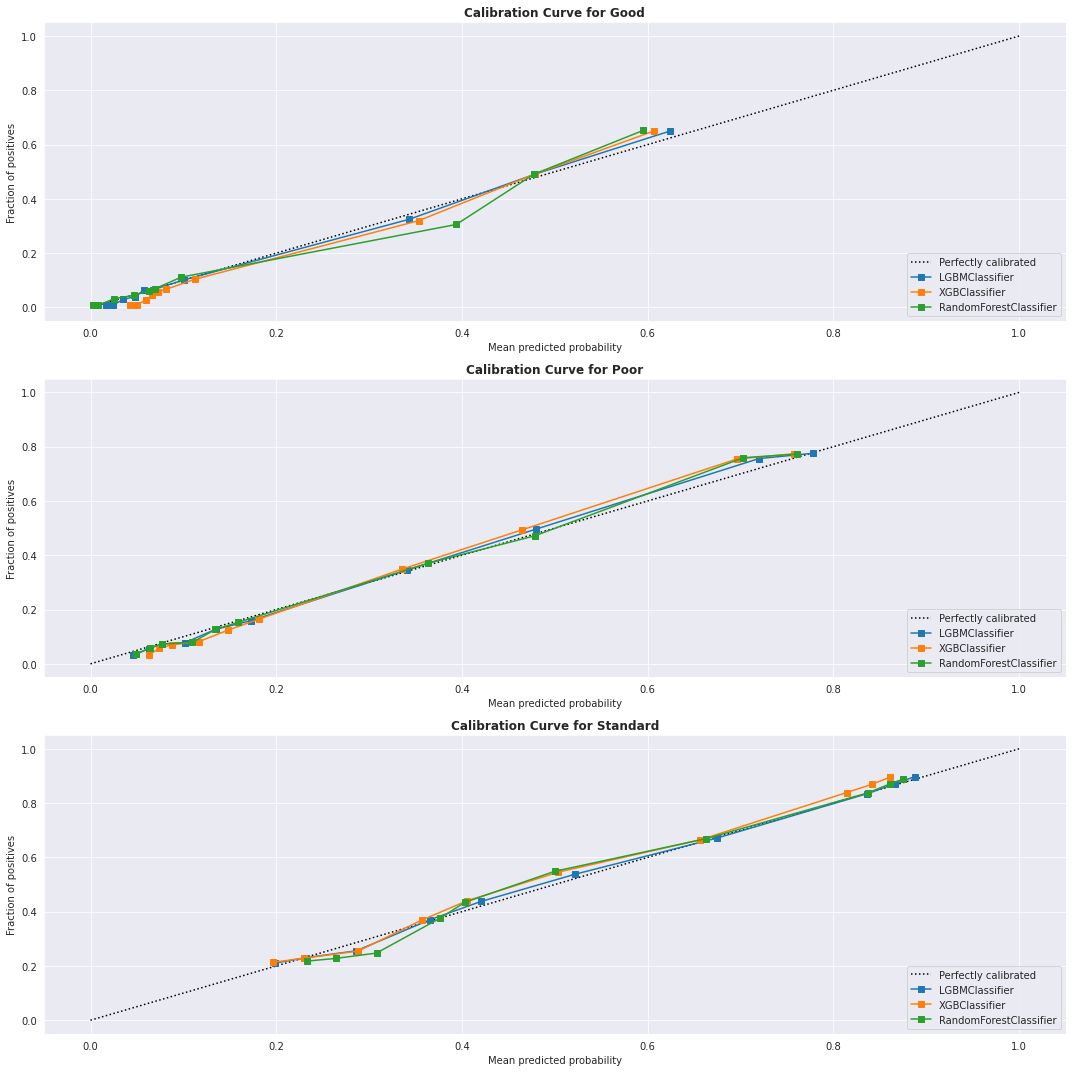

In [59]:
fig,axes=plt.subplots(3,1,figsize=(15,15))
ax=axes.flatten()

for i,classes in enumerate(list(label.classes_)):
    ax[i].set_title(f"Calibration Curve for {classes}",fontweight="bold")
    for name,prediction in probas.items():
        y_real=y_true[:,i]
        y_prob=probas[name][0][:,i]
        CalibrationDisplay.from_predictions(y_real,y_prob,n_bins=10, strategy='quantile',ax=ax[i],name=name);
        
plt.tight_layout()
plt.savefig("image16.png")

**The probabilities predicted by the models for each class in target variable is well calibrated. Therefore there is no need to calibrate the predicted probabailities.**

In [60]:
probas["Average_Models"]=[np.add(probas["LGBMClassifier"][0],probas["XGBClassifier"][0])]
probas["Average_Models"]=[np.add(probas["Average_Models"][0],probas["RandomForestClassifier"][0])/3]

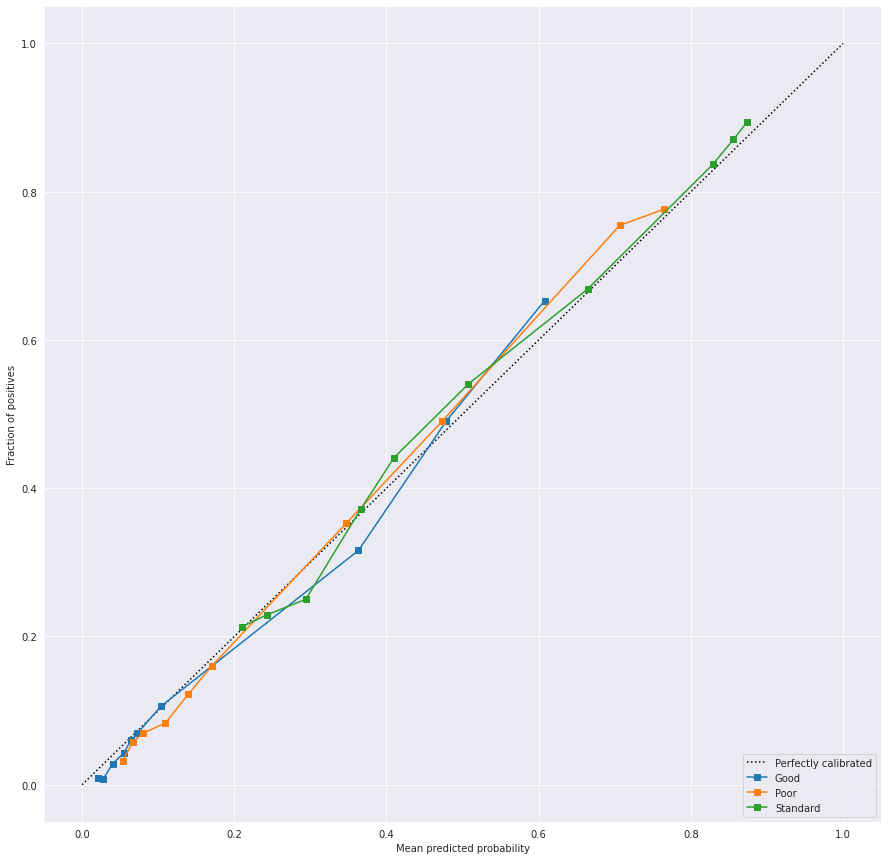

In [61]:
plt.figure(figsize=(15,15))
axes=plt.subplot(1,1,1)

for i,classes in enumerate(list(label.classes_)):
    y_real=y_true[:,i]
    y_prob=probas["Average_Models"][0][:,i]
    CalibrationDisplay.from_predictions(y_real,y_prob,n_bins=10, strategy='quantile',name=classes,ax=axes);
plt.savefig("image17.png")

In [62]:
for models in probas.keys():
    sol=np.argmax(probas[models][0],axis=1)
    score=f1_score(y,sol,average="macro")
    print(f"\n{models} f1 score is: {score}")


LGBMClassifier f1 score is: 0.6796908047277473

XGBClassifier f1 score is: 0.6789814694841364

RandomForestClassifier f1 score is: 0.6777239844397543

Average_Models f1 score is: 0.6796383145281221


**The ensemble of model performed better than individual model, we can also try weights ensemble and stacking. Plus data oversampling of minority instances classes and undersampling of overlapping instances using imblearn library**.

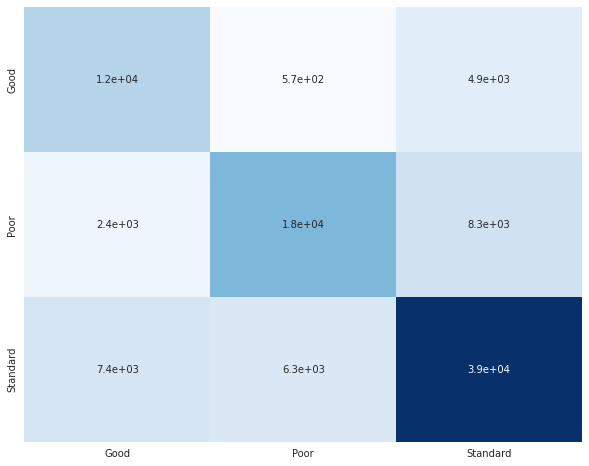

In [63]:
plt.figure(figsize=(10,8))
sns.heatmap(confusion_matrix(y,sol),annot=True,cbar=False,xticklabels=label.classes_,yticklabels=label.classes_,cmap="Blues");
plt.savefig("image18.png")

In [64]:
print(classification_report(y,sol))

              precision    recall  f1-score   support

           0       0.56      0.69      0.62     17823
           1       0.73      0.63      0.68     28988
           2       0.75      0.74      0.75     53149

    accuracy                           0.70     99960
   macro avg       0.68      0.69      0.68     99960
weighted avg       0.71      0.70      0.70     99960

